In [11]:
import numpy as np
import matplotlib
import random

ModuleNotFoundError: No module named 'nnfs'

In [2]:
def relu(z): 
    # activation function
    return 1 / (1+np.exp(-z))

feats = np.random.rand(3,4)
weights = np.random.rand(2,4)
b = random.randint(1,10)
activ = np.dot(weights, feats.T) - b

activo = relu(activ)
activo

array([[0.61202402, 0.75803897, 0.53120442],
       [0.44918682, 0.54020654, 0.40953461]])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Example input array
x = np.array([-1, 0, 1, 2])

# Applying sigmoid and ReLU
sigmoid_output = sigmoid(x)
relu_output = relu(x)

print("Sigmoid output:", sigmoid_output)
print("ReLU output:", relu_output)

Sigmoid output: [0.26894142 0.5        0.73105858 0.88079708]
ReLU output: [0 0 1 2]


In [4]:
x = np.array([[-0.1, 0.3, 0.4, -0.1, 0.3, 0.4],
            [0.1, 2, 0.2],
            [0, 1, 0.1],
            [0.3, 0, 0.4]]) 
arr = np.any(x == 0, axis=0)
res = np.where(arr)
x[:,res] = 0
x

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [5]:
arr

NameError: name 'arr' is not defined

### Simply Using Numpy

In [6]:
inputs = np.array([[ 1,   2,    3,    2.5],
              [ 2.0, 5.0, -1.0,  2.0],
              [-1.5, 2.7,  3.3, -0.8]])

weights = np.array([[  0.2,   0.8, -0.5 ,  1.0], 
                    [  0.5,  -0.91, 0.26, -0.5],
                    [ -0.26, -0.27, 0.17,  0.87]])

bias = np.array([2,3,0.5])

weights2 = np.array([[  0.1,   -0.14, -0.5], 
                    [  -0.5,  0.12, -0.33],
                    [ -0.44, 0.73, -0.13]])

bias2 = np.array([-1,2,-0.5])

layer1_outputs = np.dot(inputs, weights.T) + bias

layer2_outputs = np.dot(layer1_outputs, weights2.T) + bias2

print(layer2_outputs)

[[-1.8819  -1.04185 -2.03875]
 [ 0.0434  -2.7332  -5.7633 ]
 [-1.01914  1.41254 -0.35655]]


#### Using Objects with Numpy

In [12]:
X = np.array([[ 1,   2,    3,    2.5],
              [ 2.0, 5.0, -1.0,  2.0],
              [-1.5, 2.7,  3.3, -0.8]])

np.random.seed(0)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
# print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


#### Rectified Linear

In [7]:
X = np.array([[ 1,   2,    3,    2.5],
              [ 2.0, 5.0, -1.0,  2.0],
              [-1.5, 2.7,  3.3, -0.8]])

inputs = np.array([0,2,-1,3.3, -2.7, 1.1, 2.2, -100])
output = []

for i in inputs:
    output.append(max(0,i))

print(output)

[0, 2.0, 0, 3.3, 0, 1.1, 2.2, 0]


#### Activation

In [8]:


X = np.array([[ 1,   2,    3,    2.5],
              [ 2.0, 5.0, -1.0,  2.0],
              [-1.5, 2.7,  3.3, -0.8]])

np.random.seed(0)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
# print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


#### Data Creation

here


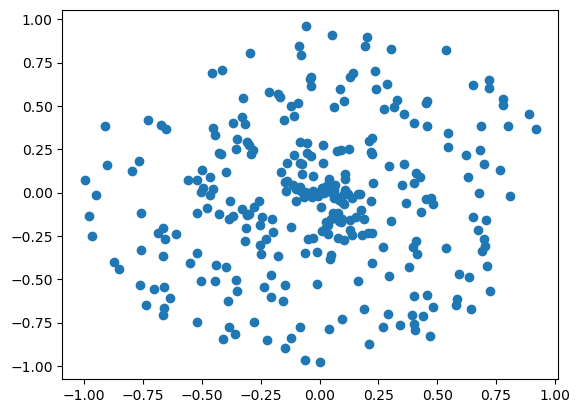

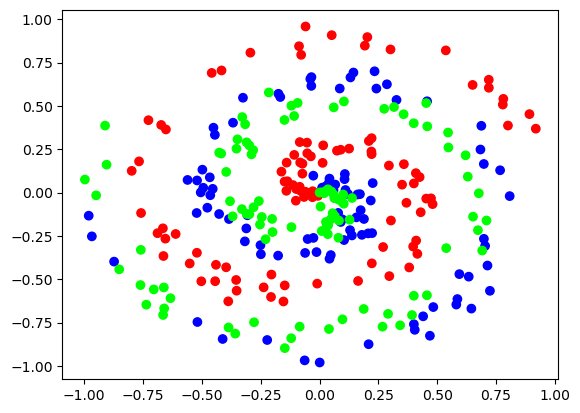

In [26]:
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0,1,points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

from matplotlib import pyplot as plt

print("here")
X, y = spiral_data(100, 3)

plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

#### Combo of ReLU and Data Creation

In [27]:
X, y = spiral_data(100, 3)

np.random.seed(0)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)
activation1.forward(layer1.output)

print(layer1.output)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.0002721   0.00101117  0.00046767  0.00126792  0.00145908]
 [-0.00310683  0.00150956 -0.00098513 -0.00179572 -0.00055808]
 ...
 [-0.0368106  -0.09665564 -0.0498788  -0.13253829 -0.1478829 ]
 [-0.18429816 -0.02890728 -0.0979504  -0.22158619 -0.1792029 ]
 [-0.17290815 -0.04328815 -0.0972897  -0.22359625 -0.188068  ]]
